In [59]:
from sklearn.ensemble import RandomForestClassifier
# ^^^ pyforest auto-imports - don't write above this line
#Import libraries
from sklearn.preprocessing import OneHotEncoder
import sklearn
import plotly as py
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix

from sklearn.preprocessing import LabelEncoder
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from pylab import plot, show, subplot, specgram, imshow, savefig
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import Normalizer
import warnings
warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plote
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import roc_auc
%matplotlib inline
#!pip install yellowbrick
plt.style.use('ggplot')

In [2]:
train=pd.read_csv("bank.csv",sep=';')

In [3]:
print(train.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [4]:
print(train.describe())

               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000  


In [5]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


In [6]:
print(train.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [7]:
train.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
yes,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


In [8]:
train['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [9]:
countNo = len(train[train.y == 'no'])
countYes = len(train[train.y == 'yes'])
print('Percentage of "No": {:.3f}%'. format((countNo/(len(train.y))*100)))
print('Percentage of "Yes": {:.3f}%'. format((countYes/(len(train.y))*100)))

Percentage of "No": 88.476%
Percentage of "Yes": 11.524%


In [10]:
# To check how many columns have missing values 
def show_missing():
    missing = train.columns[train.isnull().any()].tolist()
    return missing

In [11]:
train[show_missing()].isnull().sum()#No missing Values

Series([], dtype: float64)

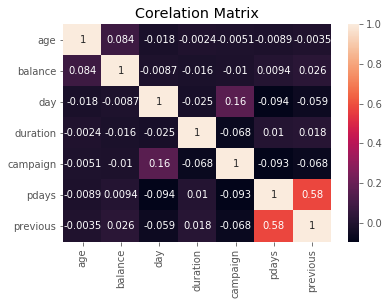

In [12]:
#Correlation
sns.heatmap(train.corr(), annot=True)
plt.title('Corelation Matrix');

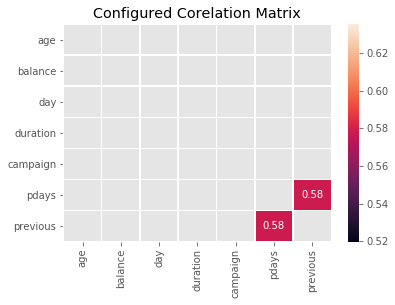

In [13]:
corr = train.corr()
sns.heatmap(corr[((corr >= 0.3) | (corr <= -0.3)) & (corr != 1)], annot=True, linewidths=.5, fmt= '.2f')
plt.title('Configured Corelation Matrix');

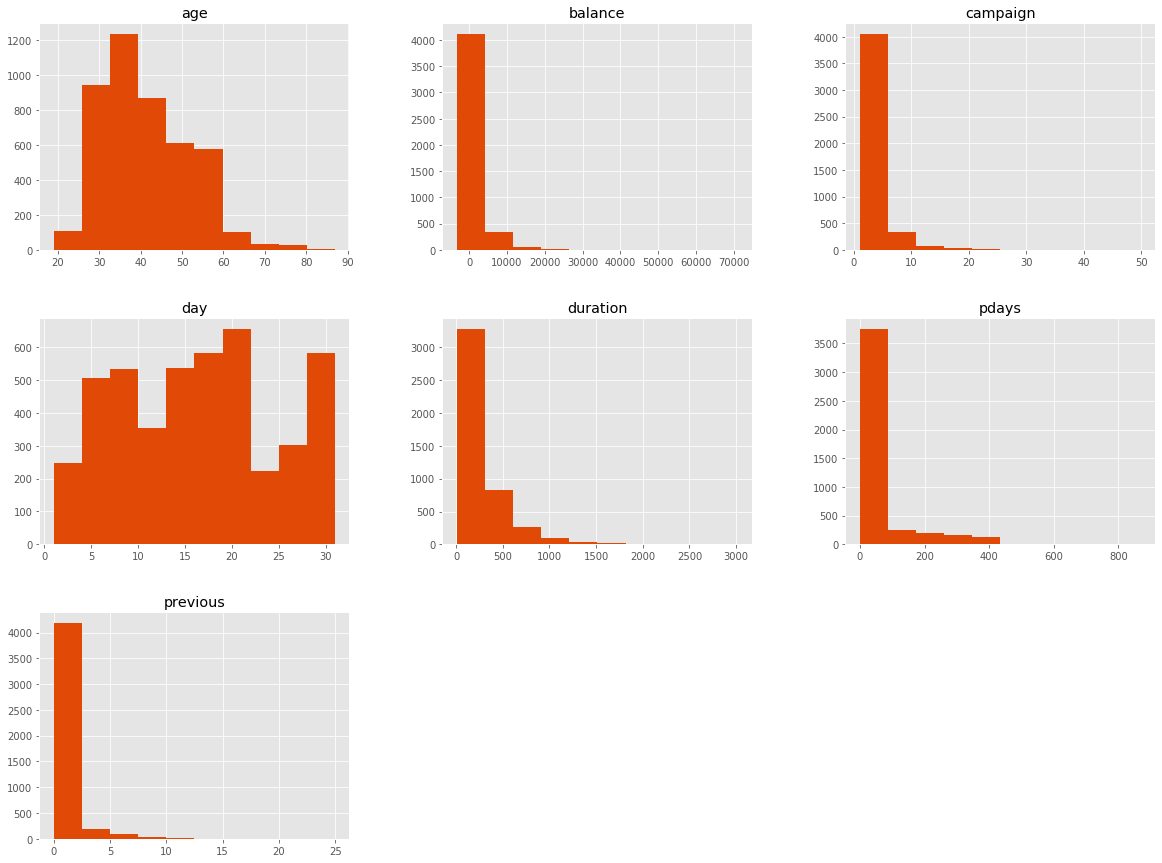

In [14]:
# Let's see how the numeric data is distributed.
train.hist(bins=10, figsize=(20,15), color='#E14906')
plt.show()

Text(0, 0.5, 'mean durations')

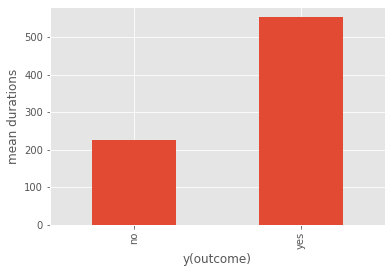

In [15]:
ax = train.groupby('y').duration.mean().plot(kind='bar')
ax.set_xlabel("y(outcome)")
ax.set_ylabel("mean durations")
#mean duration for subscribing is higher than non-subscribing

Text(0, 0.5, 'mean ages')

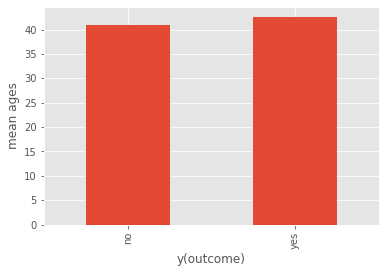

In [16]:
ax = train.groupby('y').age.mean().plot(kind='bar')
ax.set_xlabel("y(outcome)")
ax.set_ylabel("mean ages")

Text(0, 0.5, 'mean previous')

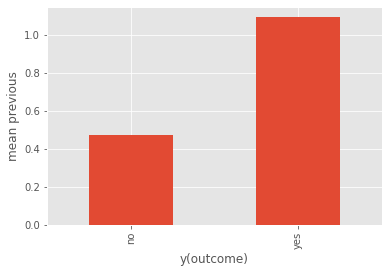

In [17]:
ax = train.groupby('y').previous.mean().plot(kind='bar')
ax.set_xlabel("y(outcome)")
ax.set_ylabel("mean previous")

In [18]:
# Binning of Age
lst = [train]
for column in lst:
    column.loc[column["age"] < 30,  "age_category"] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), "age_category"] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), "age_category"] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), "age_category"] = 50
    column.loc[column["age"] >= 60, "age_category"] = 60
 
train['age_category'] = train['age_category'].astype(np.int64)
train.dtypes

age              int64
job             object
marital         object
education       object
default         object
balance          int64
housing         object
loan            object
contact         object
day              int64
month           object
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome        object
y               object
age_category     int64
dtype: object

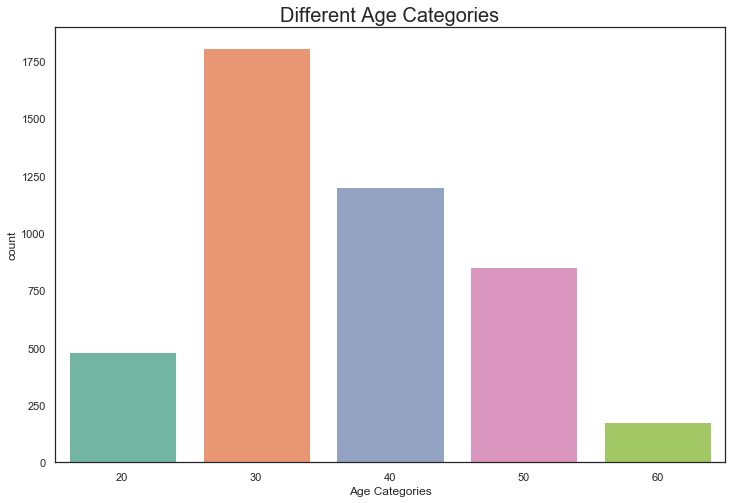

In [19]:
import seaborn as sns
sns.set(style="white")
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x="age_category", data=train, palette="Set2")
ax.set_title("Different Age Categories", fontsize=20)
ax.set_xlabel("Age Categories")
plt.show()

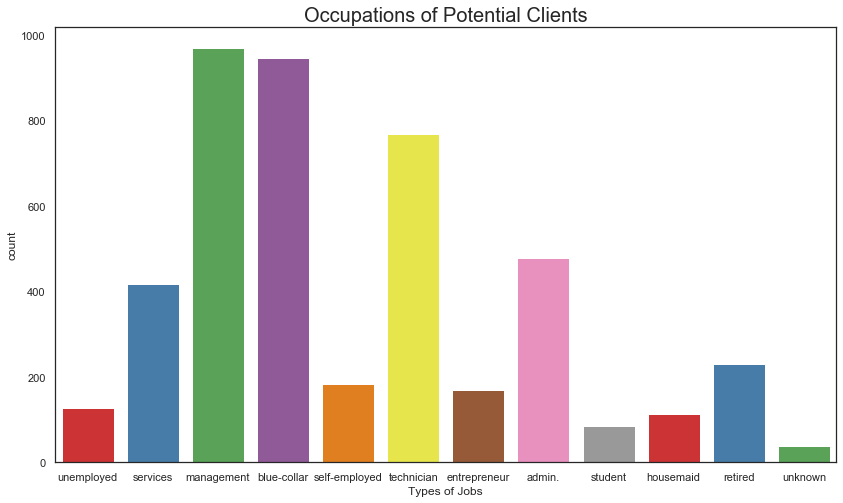

In [20]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(14,8))
sns.countplot(x="job", data=train, palette="Set1")
ax.set_title("Occupations of Potential Clients", fontsize=20)
ax.set_xlabel("Types of Jobs")
plt.show()

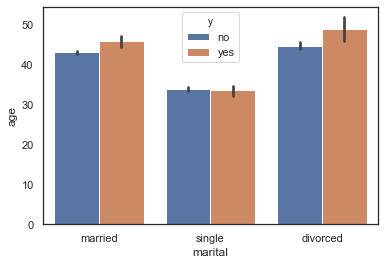

In [21]:
sns.barplot('marital','age',hue='y',data=train )


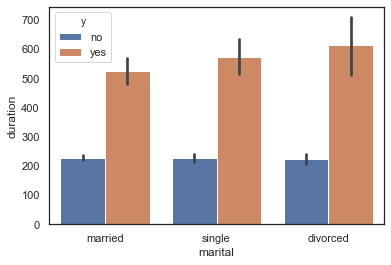

In [22]:
sns.barplot('marital','duration',hue='y',data=train )

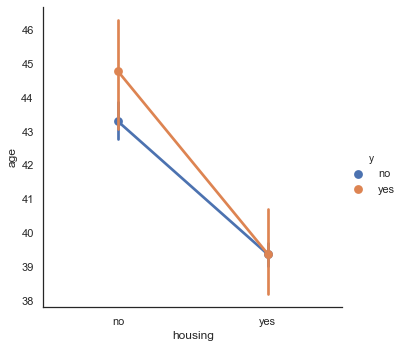

In [23]:
sns.factorplot('housing','age',hue='y',data=train )

In [24]:
#Categorical Variables
categorical_data=train.select_dtypes(exclude=np.number)
categorical_cols=train.columns
print("Categorical features :")
print(categorical_data.head())
print("===="*20)

Categorical features :
           job  marital  education default housing loan   contact month  \
0   unemployed  married    primary      no      no   no  cellular   oct   
1     services  married  secondary      no     yes  yes  cellular   may   
2   management   single   tertiary      no     yes   no  cellular   apr   
3   management  married   tertiary      no     yes  yes   unknown   jun   
4  blue-collar  married  secondary      no     yes   no   unknown   may   

  poutcome   y  
0  unknown  no  
1  failure  no  
2  failure  no  
3  unknown  no  
4  unknown  no  


In [25]:
train['duration'].describe()

count    4521.000000
mean      263.961292
std       259.856633
min         4.000000
25%       104.000000
50%       185.000000
75%       329.000000
max      3025.000000
Name: duration, dtype: float64

In [26]:
#Feature Engineering on Duration Data
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(train);

In [27]:
#Feature engineering
train['poutcome'] = train['poutcome'].replace(['other'] , 'failure')
train['poutcome'] = train['poutcome'].replace(['unknown'] , 'failure')
train.poutcome.value_counts()

failure    4392
success     129
Name: poutcome, dtype: int64

In [28]:
# Combine similar jobs into categiroes
train['job'] = train['job'].replace(['management', 'admin.'], 'admin/manag')
train['job'] = train['job'].replace(['services','housemaid'], 'home/service')
train['job'] = train['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'unemployed')

In [29]:
#Label Encoding
encoding_list = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month','poutcome','y']
train[encoding_list] = train[encoding_list].apply(LabelEncoder().fit_transform)

In [30]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'age_category'],
      dtype='object')

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'age_category'] 
X = train[cols]
y = train['y']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model,8)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['education', 'default', 'housing', 'loan', 'contact', 'duration', 'previous', 'poutcome']


Optimal number of features: 11
Selected features: ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'duration', 'campaign', 'previous', 'poutcome', 'age_category']


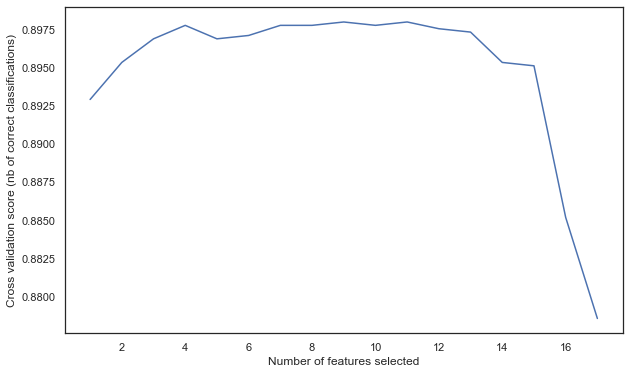

In [32]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

['education', 'default', 'housing', 'loan', 'contact', 'duration', 'previous', 'poutcome', 'y']
Index(['education', 'default', 'housing', 'loan', 'contact', 'duration',
       'previous', 'poutcome', 'y'],
      dtype='object')


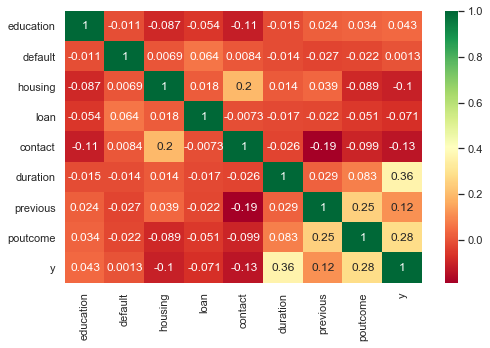

In [33]:
Selected_features=list(X.columns[rfe.support_])
Selected_features.append('y')
print(Selected_features)
final_train=train[Selected_features]
print(final_train.columns)
plt.subplots(figsize=(8, 5))
sns.heatmap(final_train.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [34]:
def print_results(results):
    print('BEST PARAMS:{}\n'.format(results.best_params_))
    
    means=results.cv_results_['mean_test_score']
    stds=results.cv_results_['std_test_score']
    for mean,std,params in zip(means,stds,results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3),round(std*2,3),params))

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_train.drop(['y'], axis=1), final_train['y'], test_size = 0.2, random_state=2)

# Create logistic regression
logistic = LogisticRegression()

# Create regularization penalty space
penalty = [ 'l2']#"l1"

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)#scoring = 'recall'

# Fit grid search
best_model = clf.fit(X, y)

# View best hyperparameters
print('Best Penalty:',best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print_results(clf)


Best Penalty: l2
Best C: 464.15888336127773
BEST PARAMS:{'C': 464.15888336127773, 'penalty': 'l2'}

0.881 (+/-0.009) for {'C': 1.0, 'penalty': 'l2'}
0.879 (+/-0.008) for {'C': 2.7825594022071245, 'penalty': 'l2'}
0.878 (+/-0.012) for {'C': 7.742636826811269, 'penalty': 'l2'}
0.879 (+/-0.008) for {'C': 21.544346900318832, 'penalty': 'l2'}
0.881 (+/-0.007) for {'C': 59.94842503189409, 'penalty': 'l2'}
0.881 (+/-0.007) for {'C': 166.81005372000593, 'penalty': 'l2'}
0.881 (+/-0.006) for {'C': 464.15888336127773, 'penalty': 'l2'}
0.878 (+/-0.012) for {'C': 1291.5496650148827, 'penalty': 'l2'}
0.881 (+/-0.007) for {'C': 3593.813663804626, 'penalty': 'l2'}
0.88 (+/-0.015) for {'C': 10000.0, 'penalty': 'l2'}


In [46]:
# Create logistic regression
logreg = LogisticRegression(penalty=best_model.best_estimator_.get_params()['penalty'],C=best_model.best_estimator_.get_params()['C'])

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]


Train/Test split results:
[-5.41300358]
loan        -0.678808
contact     -0.516030
housing     -0.483255
previous     0.054642
education    0.152449
default      0.155416
duration     1.124414
poutcome     2.360138
dtype: float64
LogisticRegression accuracy is 0.919
LogisticRegression log_loss is 0.230
LogisticRegression auc is 0.871
[[806   8]
 [ 65  26]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       814
           1       0.76      0.29      0.42        91

    accuracy                           0.92       905
   macro avg       0.85      0.64      0.69       905
weighted avg       0.91      0.92      0.90       905



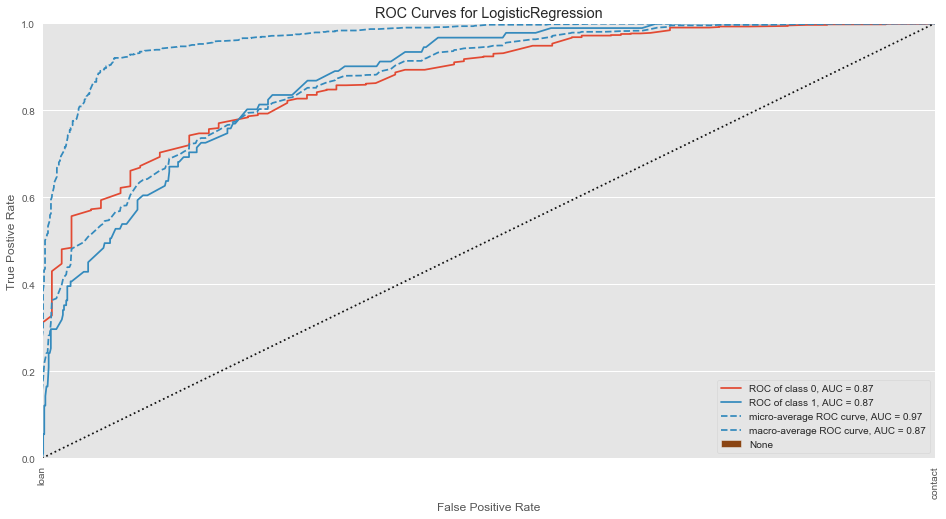

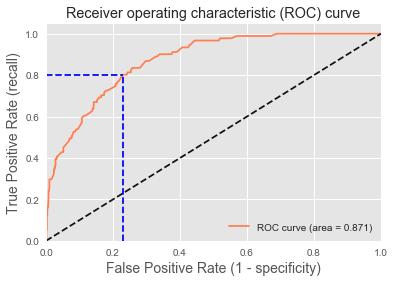

Using a threshold of 0.132 guarantees a sensitivity of 0.802 and a specificity of 0.770, i.e. a false positive rate of 22.97%.


In [63]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.intercept_)
#print(logreg.coef_)
coef1 = pd.Series(logreg.coef_.ravel(), list(X_train.columns)).sort_values()
print(coef1)
coef1.plot(kind='bar', title='Model Coefficients',figsize=(16,8),color='saddlebrown')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
# print confusion matrix
print(confusion_matrix)
from sklearn.metrics import classification_report
# printing classification report
print(classification_report(y_test, y_pred))

# using visualizer
visualizer = roc_auc(logreg,X_train,y_train,X_test,y_test)


idx = np.min(np.where(tpr > 0.8)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [48]:
# Learning Curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [49]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
  
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

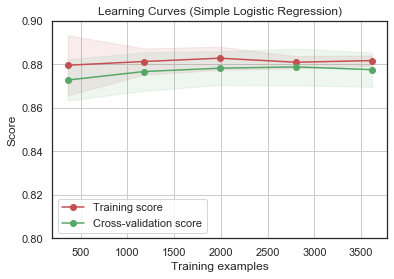

In [50]:
title = "Learning Curves (Simple Logistic Regression)"
cv = ShuffleSplit(n_splits=15, test_size=0.20, random_state=0)
estimator = logreg
plot_learning_curve(estimator, title, X, y, (0.80,0.90), cv=cv, n_jobs=10)
plt.show()

In [51]:
# KNearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()
print(knn_mean)

0.8838502278831752


In [79]:
#Feature Engineering : Done (18th July)
#Grid Search : Done(18th July)

## Trying Random Forest

In [52]:

# splitting the data
#x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(final_train.drop(['y'], axis=1), final_train['y'], test_size = 0.2, random_state=2)

# selecting the classifier
rfc = RandomForestClassifier()
# selecting the parameter
param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }
# using grid search with respective parameters
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
# fitting the model
grid_search_model.fit(X_train, y_train)
# printing the best parameters
print('Best Parameters are:',grid_search_model.best_params_)

<IPython.core.display.Javascript object>

Best Parameters are: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2'}


### Applying the best parameters obtained using Grid Search on Random Forest model

In the task below, we fit a random forest model using the best parameters obtained using Grid Search. Since the target is imbalanced, we apply Synthetic Minority Oversampling (SMOTE) for undersampling and oversampling the majority and minority classes in the target respectively. 

__Kindly note that SMOTE should always be applied only on the training data and not on the validation and test data.__

You can try experimenting with and without SMOTE and check for the difference in recall.

              precision    recall  f1-score   support

           0       0.97      0.77      0.85       814
           1       0.27      0.76      0.39        91

    accuracy                           0.77       905
   macro avg       0.62      0.76      0.62       905
weighted avg       0.90      0.77      0.81       905



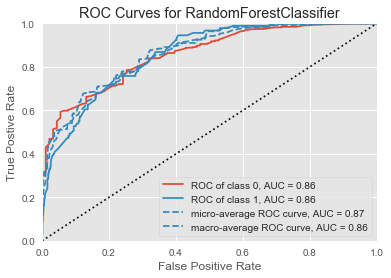

In [92]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import roc_auc


# A function to use smote
def grid_search_random_forrest_best(dataframe,target):
    
    X_train, X_test, y_train, y_test = train_test_split(final_train.drop(['y'], axis=1), final_train['y'], test_size = 0.2, random_state=2)
    smote = SMOTE(sampling_strategy='auto')
    X_sm, y_sm =  smote.fit_sample(X_train, y_train)    
    rfc = RandomForestClassifier(n_estimators=11, max_features='log2', max_depth=7, criterion='gini',random_state=42)
    rfc.fit(X_sm, y_sm)
    y_pred = rfc.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    #print(confusion_matrix(y_test, y_pred))
    visualizer = roc_auc(rfc,X_sm,y_sm,X_test,y_test)


grid_search_random_forrest_best(X,y)

              precision    recall  f1-score   support

           0       0.97      0.77      0.86       814
           1       0.27      0.77      0.40        91

    accuracy                           0.77       905
   macro avg       0.62      0.77      0.63       905
weighted avg       0.90      0.77      0.81       905



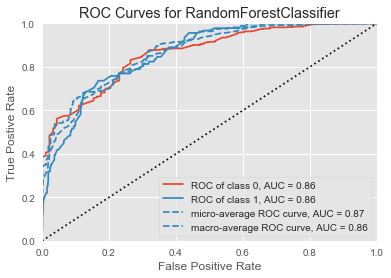

In [97]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import roc_auc


# A function to use smote
def grid_search_random_forest_best(dataframe,target):
    X_train, X_test, y_train, y_test = train_test_split(final_train.drop(['y'], axis=1), final_train['y'], test_size = 0.2, random_state=2)
    smote = SMOTE(sampling_strategy='auto')
    X_sm, y_sm =  smote.fit_sample(X_train, y_train)    
    rfc = RandomForestClassifier(n_estimators=11, max_features='log2', max_depth=7, criterion='gini',random_state=42)
    rfc.fit(X_sm, y_sm)
    y_pred = rfc.predict(X_test)
    print(classification_report(y_test, y_pred))
    #print(confusion_matrix(y_test, y_pred))

    
#     print(classification_report(y_val, y_pred))
#     print(confusion_matrix(y_val, y_pred))
    visualizer = roc_auc(rfc,X_sm,y_sm,X_test,y_test)


grid_search_random_forest_best(X,y)

## Applying the grid search function for random forest only on the best features obtained using Random Forest

              precision    recall  f1-score   support

           0       0.97      0.75      0.84       814
           1       0.26      0.79      0.39        91

    accuracy                           0.75       905
   macro avg       0.61      0.77      0.62       905
weighted avg       0.90      0.75      0.80       905



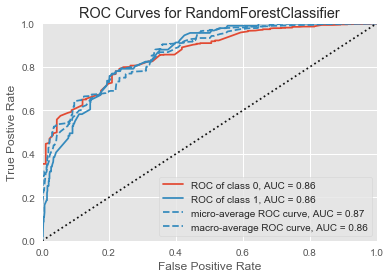

In [99]:
grid_search_random_forrest_best(X[['marital', 'education', 'default', 'housing', 'loan', 'contact', 'duration', 'campaign', 'previous', 'poutcome', 'age_category']
],y)

In [ ]:
#Things to try
# 1.Grid Search for optimal value of C in Logistic Regression and K  in KNearestNeighbour
# 2.Different Feature Selection and Engineering Methods
# 3.Cross-Validation
# 4.IMBALANCED DATASET FIX
# 5.Other Non Linear Methods

In [105]:
#Applying XGBOOST
from xgboost import XGBClassifier 
smote = SMOTE()
# applying smote
X_sm, y_sm =  smote.fit_sample(X_train, y_train)
# initializing XGBoost classifier
model = XGBClassifier(n_estimators=50, max_depth=4)
# fitting the model
model.fit(pd.DataFrame(X_sm,columns=X_train.columns), y_sm)
# predicting the model
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.96      0.77      0.86       814
           1       0.26      0.73      0.38        91

    accuracy                           0.77       905
   macro avg       0.61      0.75      0.62       905
weighted avg       0.89      0.77      0.81       905



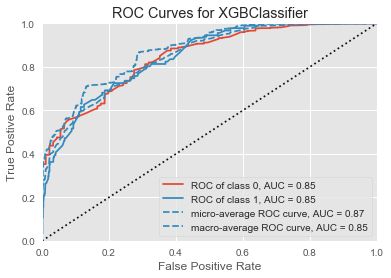

In [107]:
# printing classification report
print(classification_report(y_test, y_pred))
# printing confusion matrix
#print(confusion_matrix(y_test, y_pred))
# using visualizer to 
visualizer = roc_auc(model,X_sm,y_sm,X_test,y_test)

## Ensembling

Ensemble learning uses multiple machine learning models  to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. In the below task, we have used an ensemble of three models - `RandomForestClassifier()`, `GradientBoostingClassifier()`, `LogisticRegression()`. Feel free to modify this function as per your requirements and fit more models or change the parameters for every model.

In [126]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier

# using smote
smote = SMOTE()
X_sm, y_sm =  smote.fit_sample(X_train, y_train)
# models to use for ensembling  
model1 = RandomForestClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()
model4=XGBClassifier()
# fitting the model
model = VotingClassifier(estimators=[('rf', model1), ('knn', model2), ('lr',model3),("xgb",model4)], voting='soft')
model.fit(X_sm,y_sm)
# predicting balues and getting the metrics
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.96      0.84      0.90       814
           1       0.32      0.69      0.44        91

    accuracy                           0.82       905
   macro avg       0.64      0.77      0.67       905
weighted avg       0.90      0.82      0.85       905



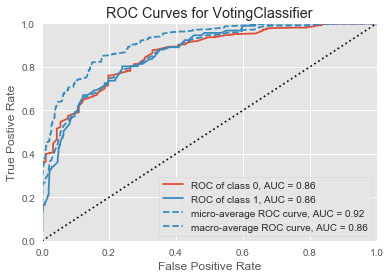

In [127]:
print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_val, y_pred))
visualizer = roc_auc(model,X_sm,y_sm,X_test,y_test)

## Prediction on the test data

In the below task, we have performed a prediction on the test data. We have used Logistic Regression for this prediction. You can use the model of your choice that will give you the best metric score on the validation data. 

In this task below, we will read the test file and store the `Id` column from the test file in a variable `Id`. This column would be of use to us while submission since we need to have an Id column in the submission file which is the same Id of the observations in the test data.

We have to perform the same preprocessing operations on the test data that we have performed on the train data. For demonstration purposes, we have preprocessed the test data and this preprocessed data is present in the csv file `test_preprocessed.csv`

We then make a prediction on the preprocessed test data using the Grid Search Logisitic regression model. And as the final step, we concatenate this prediction with the `Id` column and then convert this into a csv file which becomes the `submission.csv` 

In [116]:
# # Actual Test File
# test = pd.read_csv('../data/test.csv')

# # Storing the Id column
# Id = test[['Id']]

# # Preprocessed Test File
# test = pd.read_csv('../data/test_preprocessed.csv')
# test.drop('Id',1,inplace=True)
# test.head()

In [117]:
# smote = SMOTE(kind='regular')

# X_sm, y_sm =  smote.fit_sample(x_train, y_train)


# log_reg = LogisticRegression()

# param_grid = { 
#             'C' : np.logspace(-5, 8, 15)
#              }
# grid_search = GridSearchCV(log_reg, param_grid=param_grid)

# grid_search.fit(X_sm, y_sm)
    
# # Predict on the preprocessed test file
# y_pred = grid_search.predict(test)
    
# prediction = pd.DataFrame(y_pred,columns=['y'])
# submission = pd.concat([Id,prediction['y']],1)

# submission.to_csv('../data/submission.csv',index=False)